In [3]:
# conda activate anndata

import scvi
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

### Some notes

EM = early mature; LM = late mature; AC = apoptotic cell

Ref: https://www.researchsquare.com/article/rs-5461735/v1

- EM cDC1 samples of 2h p.i. with eLNPs clustered closely together with the EM cDC1 samples in steady state conditions At a later stage, both the LM steady state and LM eLNP samples remained clustered together. 

- LM cDC1 samples in the pIC condition moved towards the homeostatic condition samples. This again suggests that pIC alone may not be sufficient to induce a sustained immunogenic antiviral response.

- Taken together, unbiased transcriptional profiling reveals that uptake of non-adjuvanted eLNPs induces a homeostatic maturation program in cDC1s that is comparable to the transcriptional profile in mature cDC1 in steady state conditions, due to uptake of apoptotic cells.

- Uptake of pIC-LNPs or CpG-LNPs induces immunogenic cDC1 maturation while treatment with pIC results in a transient immunogenic response.

Ref: https://www.science.org/doi/10.1126/sciimmunol.add3955

- We found that homeostatic maturation in cDC1s was driven by AC engulfment, a process that can be modeled by uptake of nonadjuvanted lipid nanoparticles (LNPs)
- In steady-state conditions, about 10% of all cDC1s (and cDC2s) in the spleens of specific pathogen–free mice expressed high levels of the DC maturation markers MHCII and CCR7
- Pathway Analysis determined that gene expression in homeostatically matured DCs cells was enriched in “NF-κB signaling,” “DC Maturation,” and “Role of Pattern Recognition Receptors” (fig. S3), pathways that would also be expected during immunogenic maturation and hence referred to as “common” maturation pathways

- For consistency, we defined “immature” cDC1 subsets as CCR7− and “mature” cDC1 subsets as CCR7+, and the terminology “early” or “late” refers to their relative position within the immature or mature subsets
- ...we exploited the unique properties of the spleen where, in contrast to the periphery, DC maturation leads to intrasplenic migration from the red pulp and marginal zone to the white pulp (3, 29, 36, 49). Therefore, all DC maturation steps are present and may be studied within the same organ.
- ...these data suggest that, as with immunogenic maturation, intrasplenic homeostatic maturation is associated with migration of cDC1s from the red to the white pulp, and during this process, cDC1s express discrete surface markers that can be used to follow their maturation


In [4]:
adata.obs['Experimental_condition'] = adata.obs['Condition'].str.split(r" [0-9]").str[0]
print(adata.obs.value_counts("Experimental_condition"))

Experimental_condition
pIC-LNPs        27788
pIC alone       27226
CpG-LNPs        25598
eLNPs           21327
Steady state    14455
Name: count, dtype: int64


# Batch corrected on 'Condition'

In [ ]:
X_backup = adata.X
adata.X = adata.obsm["normalized_scVI"] # adata.layers["normalized_scVI"]
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.tl.pca(adata, n_comps=10, use_highly_variable=True, svd_solver="arpack")
adata.X = X_backup

### Visualize cells from each experimental condition

Starting CpG-LNPs


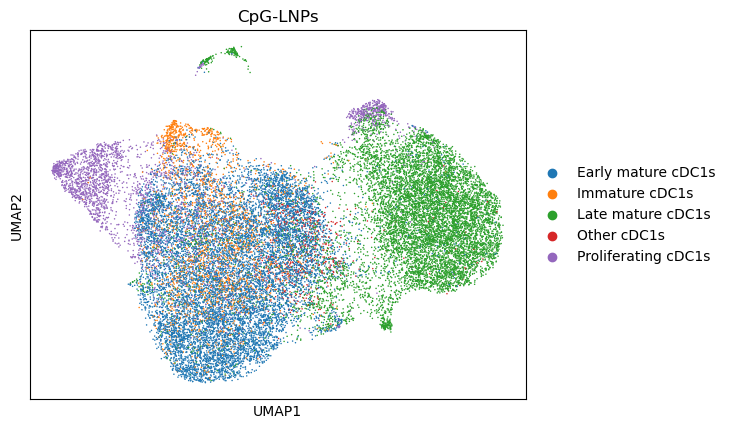

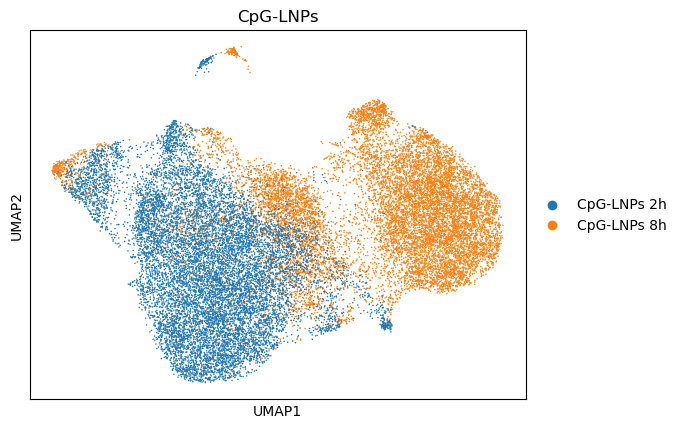

Starting Steady state


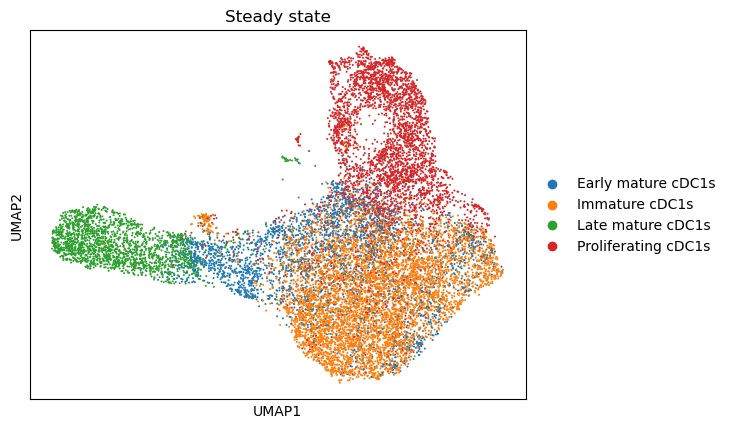

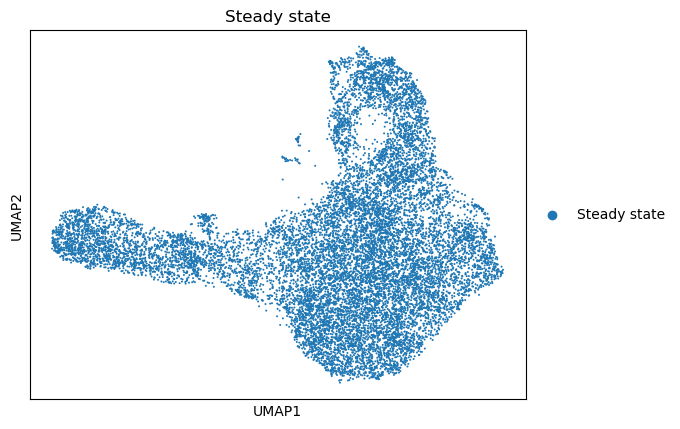

Starting eLNPs


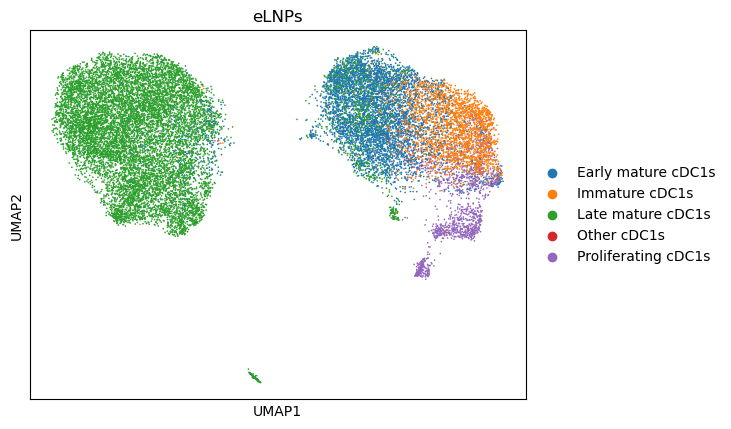

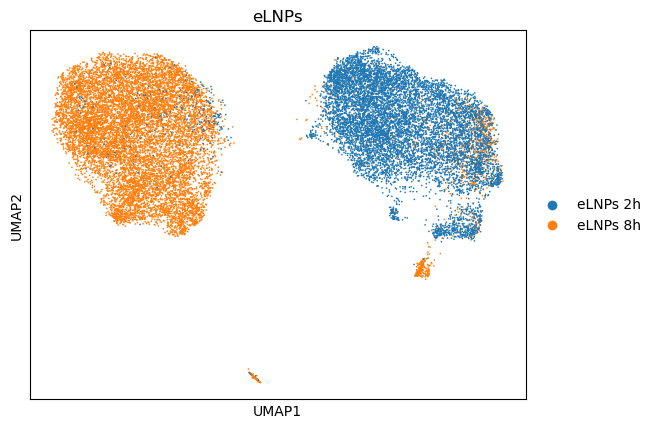

Starting pIC alone


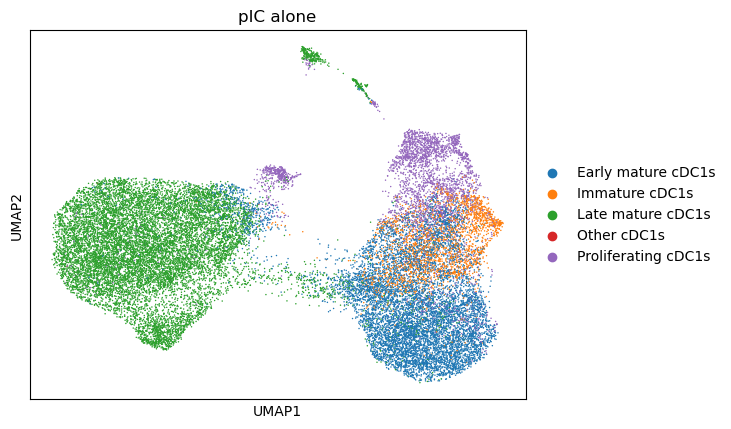

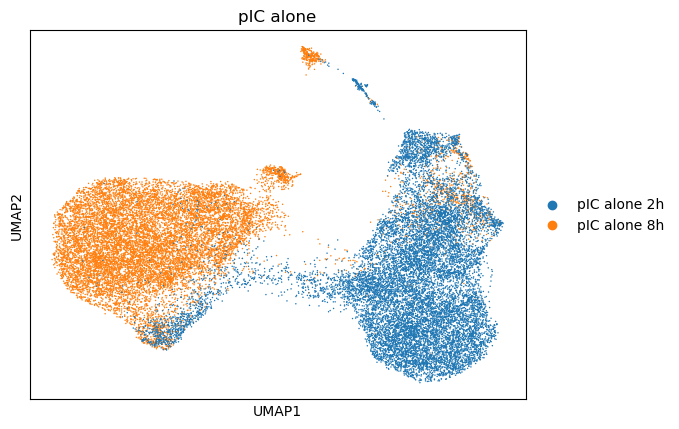

Starting pIC-LNPs


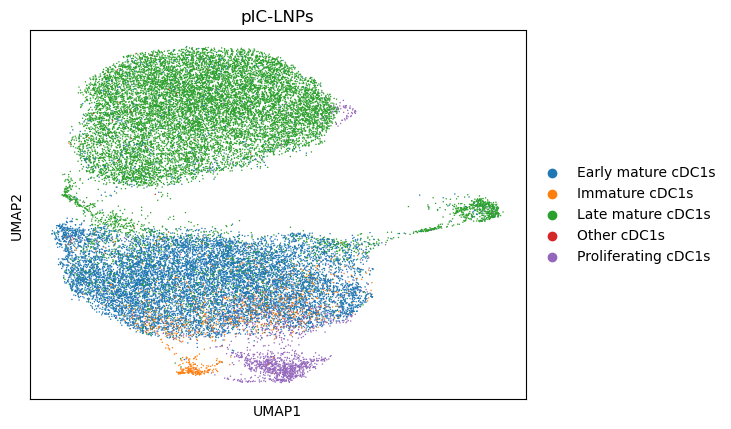

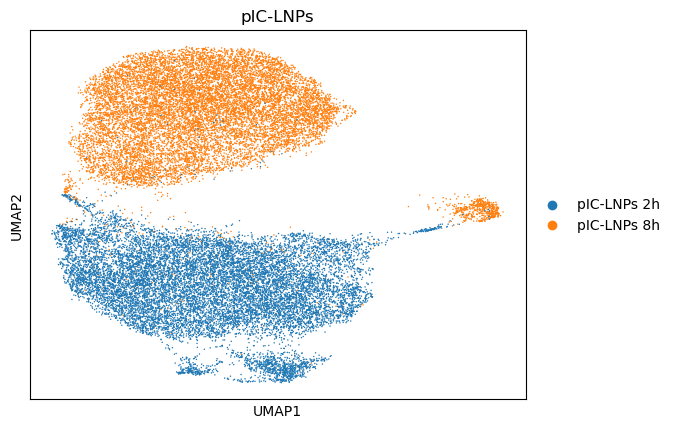

In [5]:
for cond in np.unique(adata.obs['Experimental_condition']):
    print(f"Starting {cond}")
    
    adata_subset = adata[adata.obs['Experimental_condition'].isin([cond])].copy()
    sc.pp.neighbors(adata_subset, use_rep="scVI")
    sc.tl.umap(adata_subset, min_dist=0.2)
    sc.pl.umap(adata_subset, color=['newClustersTmp'], title=cond)
    sc.pl.umap(adata_subset, color=['Condition'], title=cond)

### Visualize cells from each condition

Starting CpG-LNPs 2h


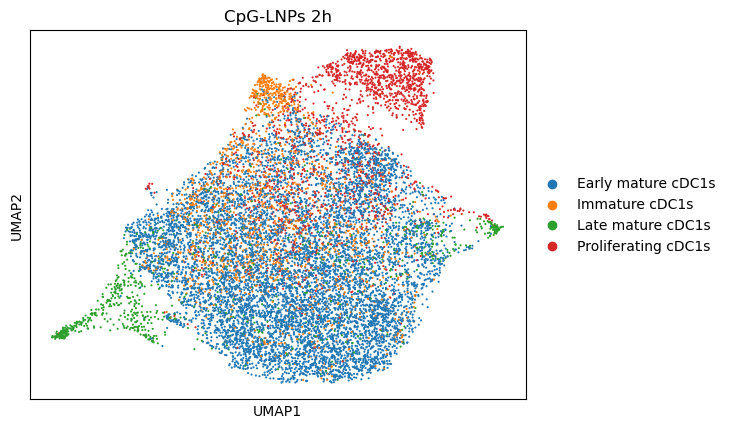

Starting CpG-LNPs 8h


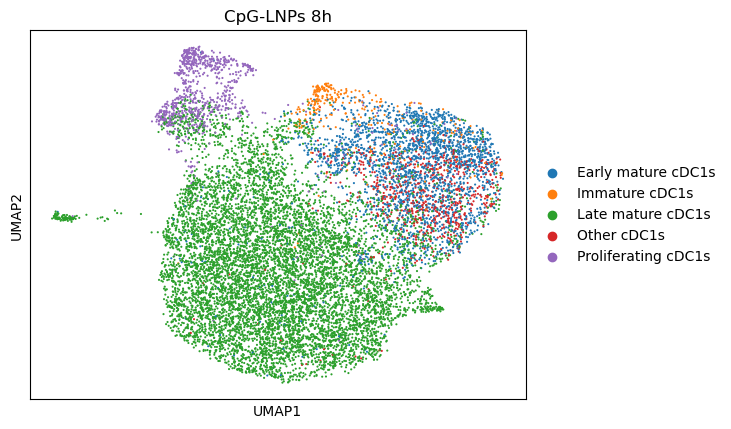

Starting Steady state


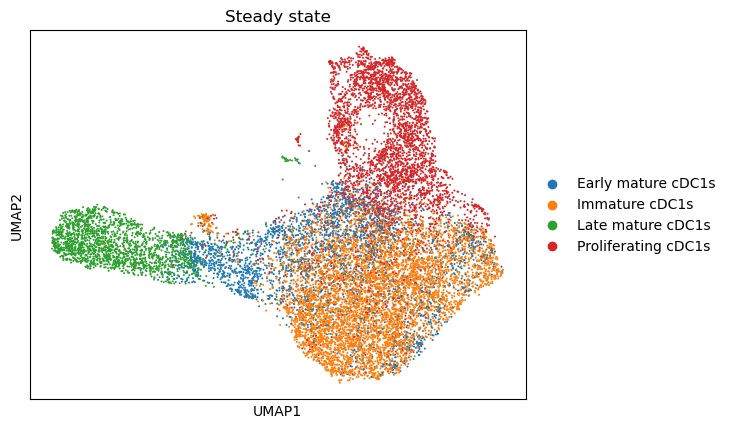

Starting eLNPs 2h


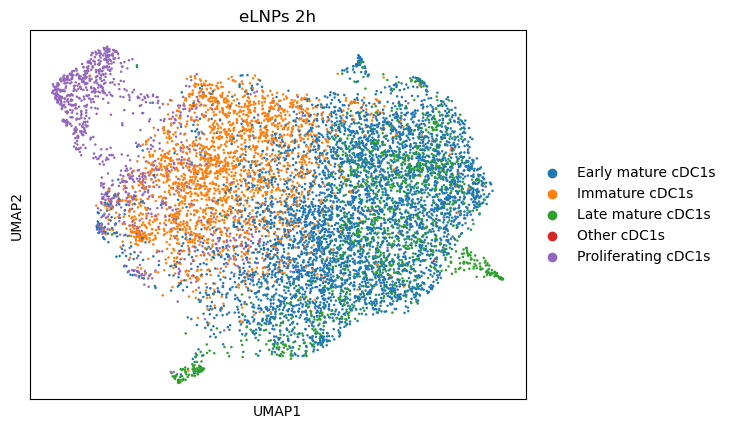

Starting eLNPs 8h


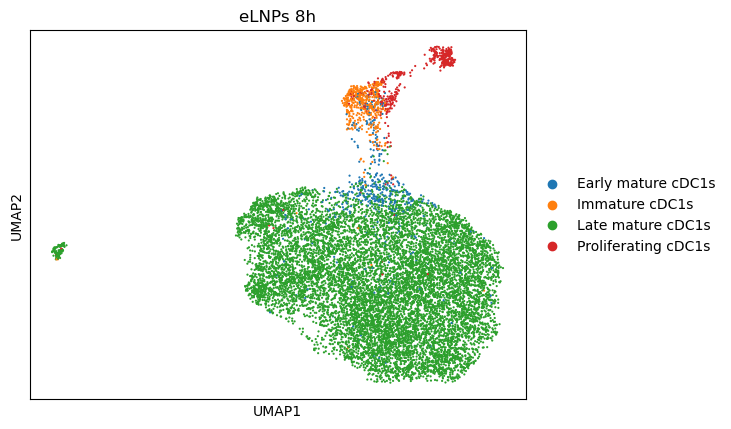

Starting pIC alone 2h


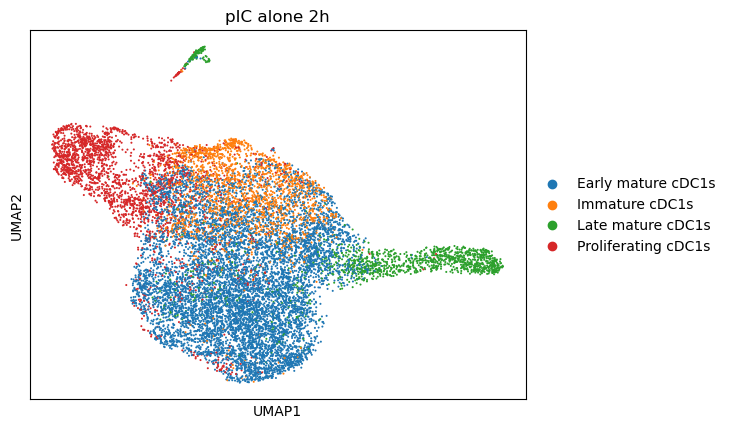

Starting pIC alone 8h


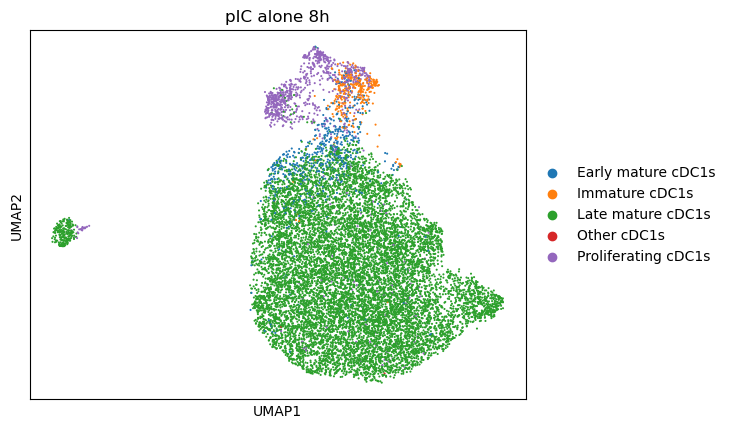

Starting pIC-LNPs 2h


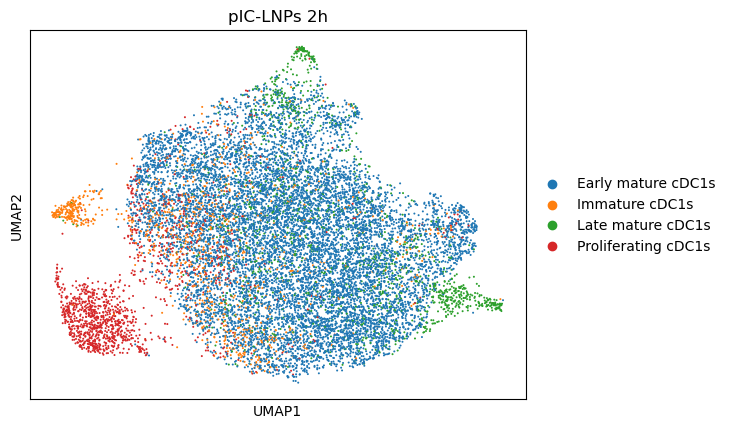

Starting pIC-LNPs 8h


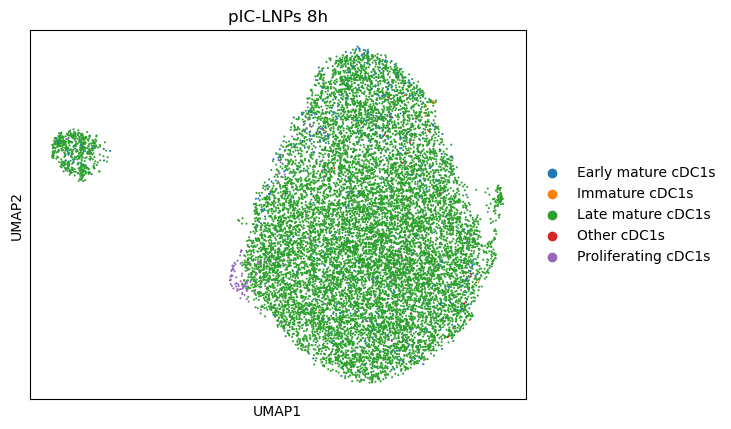

In [6]:
for cond in np.unique(adata.obs['Condition']):
    print(f"Starting {cond}")
    
    adata_subset = adata[adata.obs['Condition'].isin([cond])].copy()
    sc.pp.neighbors(adata_subset, use_rep="scVI")
    sc.tl.umap(adata_subset, min_dist=0.2)
    sc.pl.umap(adata_subset, color=['newClustersTmp'], title=cond)